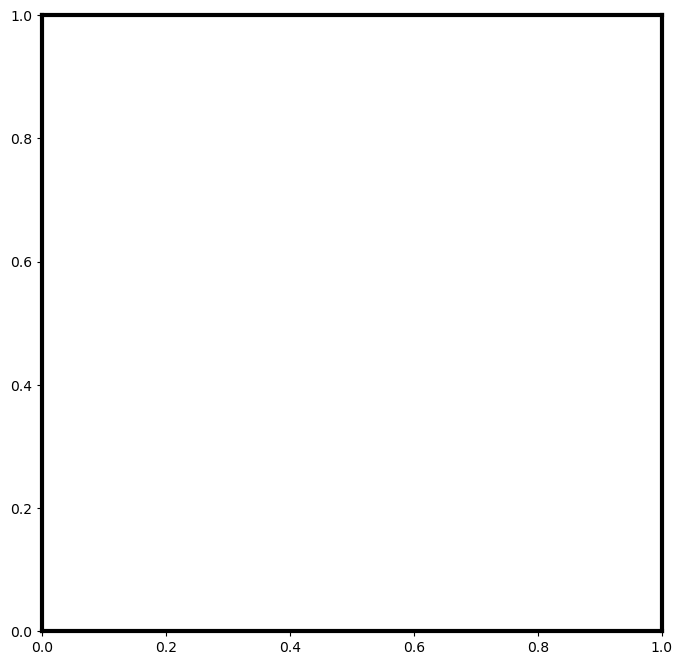

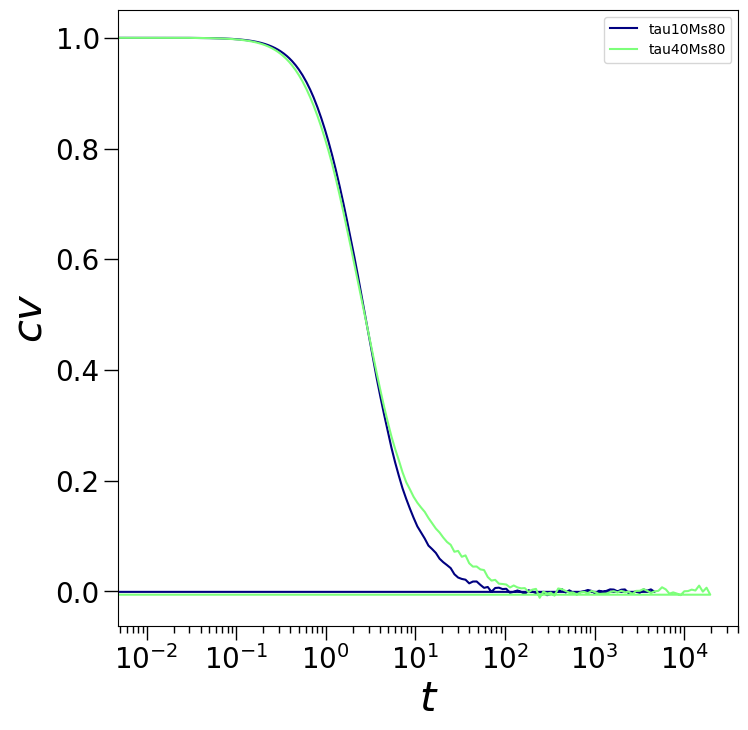

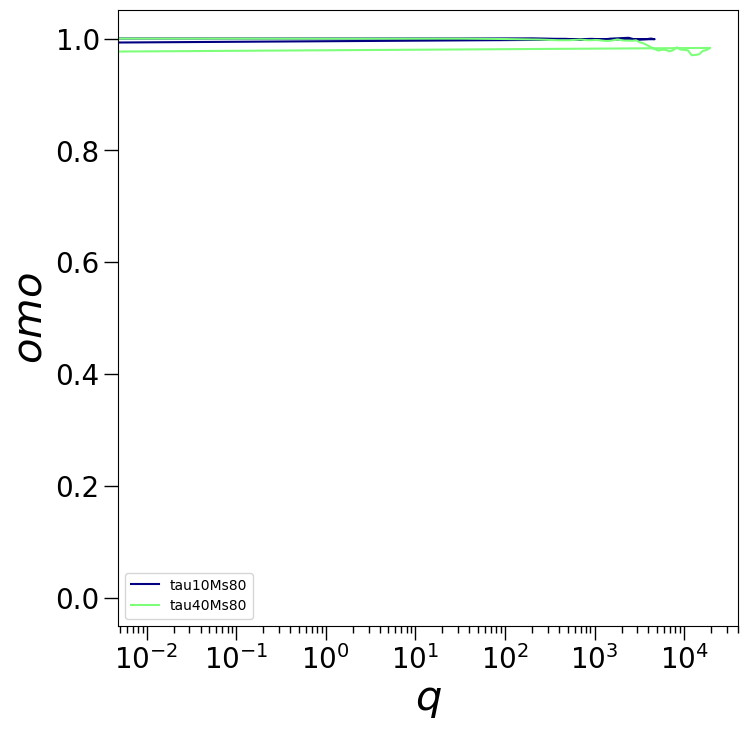

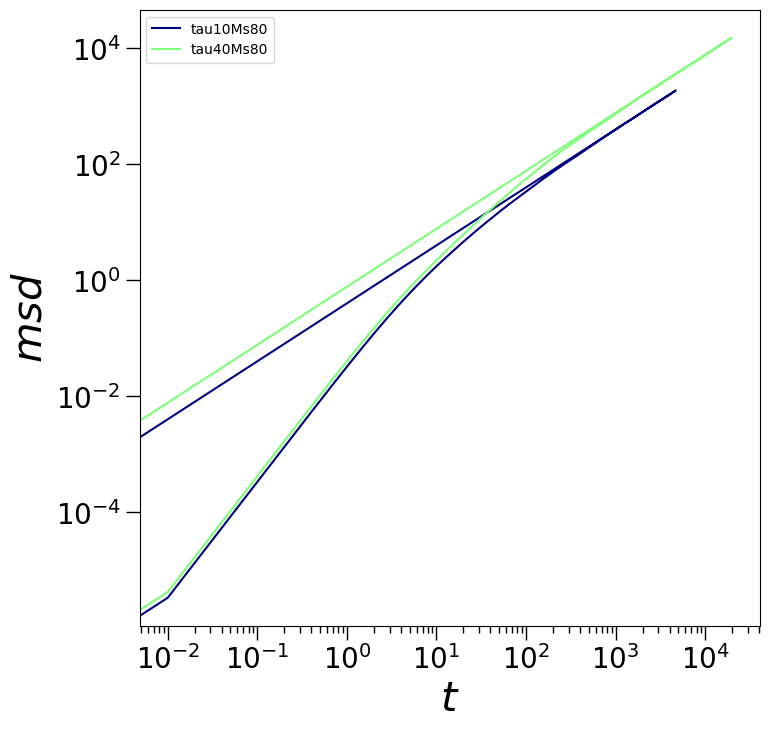

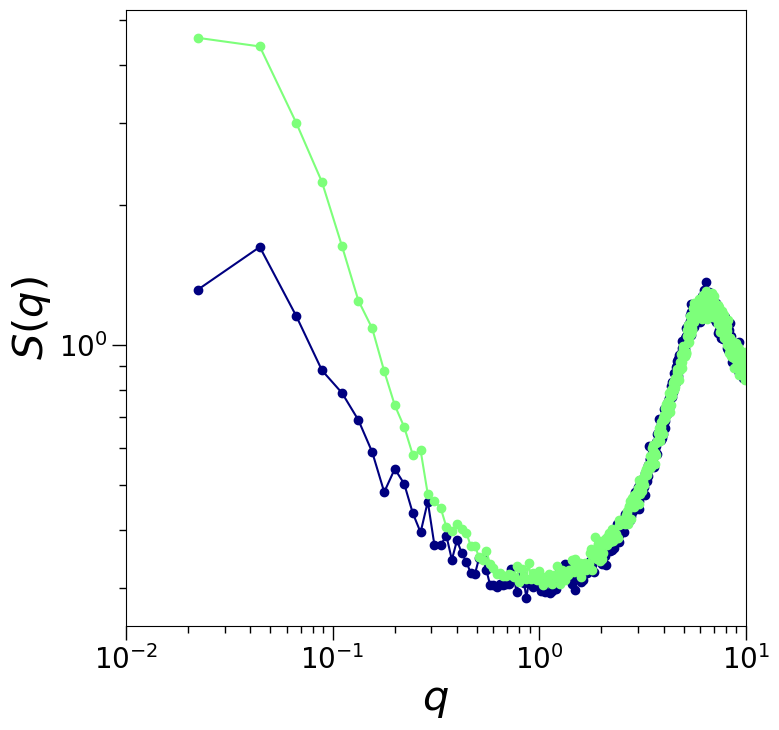

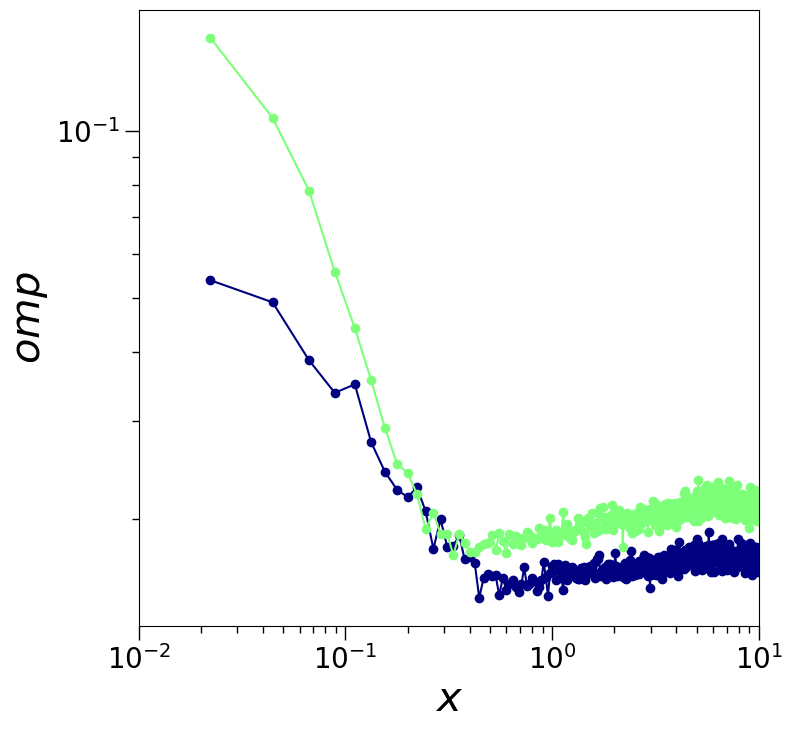

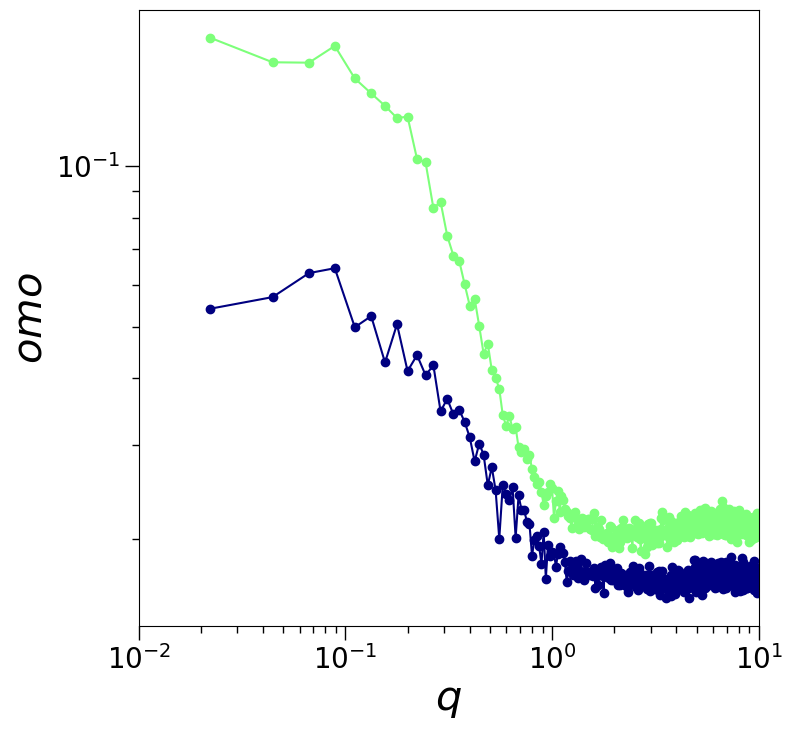

[2.19812959]
[[0.00576731]]
[3.42233229]
[[0.00254382]]


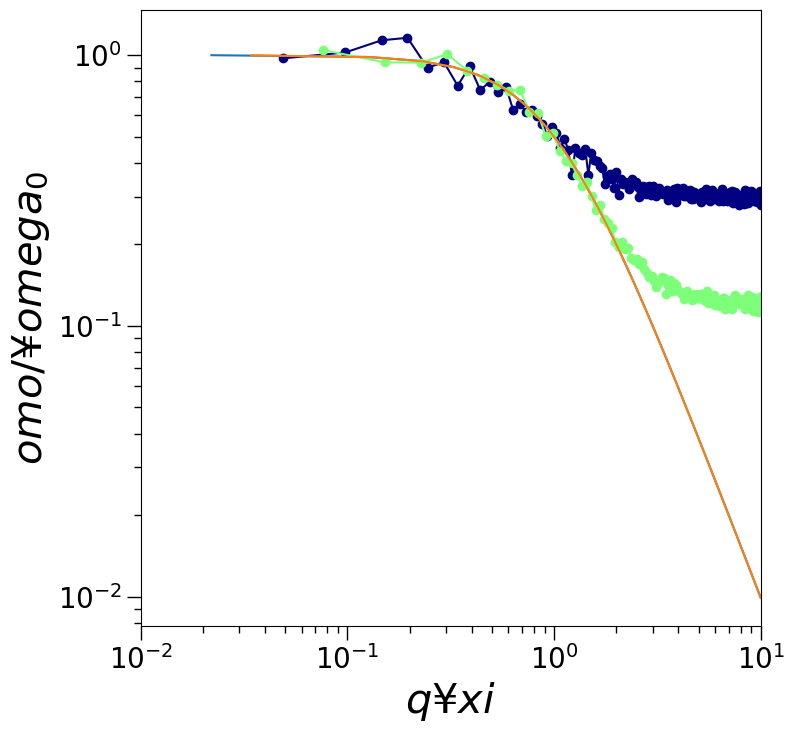

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#図の解像度が上がる
#%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.cm as cm
#Tex フォント
#plt.rcParams["text.usetex"] =True 
#図全体のサイズやアスペクト比を変える

#各自ファイルのパスを変えること
# x= np.linspace(0.01, 100, 1000)  #ログをとるとき
# plt.xlim(0,1)
# plt.ylim(-R,R)
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
from scipy.optimize import curve_fit
def plot_omo_mod(tau,Ms,lo,v0,mgn,foldername,col):
    """垂直
    """
    om_0=tau/(2*(Ms+tau))
    def funk_Zernike(q,xi):
        return om_0/(1+(xi*q)*(xi*q))
    q,sq=np.loadtxt("./{}lo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/omo_lo{:.3f}_tau{:.3f}_m{:.3f}.dat".format(foldername,lo,Ms,tau,v0,lo,tau,mgn),comments='#', unpack=True)
    k=0
    while q[k]<0.6:
        k+=1
    param,cov=curve_fit(funk_Zernike,q[1:k],sq[1:k])
    print(param)
    print(cov)
    f=open("xi_omo.dat",'a')
    f.write("{} {} {} {} {}¥n".format(tau,Ms,lo,v0,param))
    f.close()
    plt.plot(q[1:]*param,sq[1:]/om_0,"-o",color=cm.jet(col),label="omotau{}Ms{}".format(tau,Ms))
    qs=np.linspace(0.01,10/param,100)
    plt.plot(qs*param,funk_Zernike(qs,param)/om_0)
    plt.xscale('log')
    plt.yscale('log')
def plot_sq(tau,Ms,lo,v0,mgn,foldername,col):
    q,sq=np.loadtxt("./{}lo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/sq_lo{:.3f}_tau{:.3f}_m{:.3f}.dat".format(foldername,lo,Ms,tau,v0,lo,tau,mgn),comments='#', unpack=True)
    plt.plot(q[1:],sq[1:],"-o",color=cm.jet(col),label="sqtau{}Ms{}".format(tau,Ms))
    # q,sq=np.loadtxt("sq_kuro_pe{}_M{}.dat".format(tau,Ms),comments='#', unpack=True)
    # plt.plot(q,sq,"--",color="b",label="kurodatau{}Ms{}".format(tau,Ms))
def plot_omo(tau,Ms,lo,v0,mgn,foldername,col):
    """垂直
    """
    q,sq=np.loadtxt("./{}lo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/omo_lo{:.3f}_tau{:.3f}_m{:.3f}.dat".format(foldername,lo,Ms,tau,v0,lo,tau,mgn),comments='#', unpack=True)
    plt.plot(q[1:],sq[1:],"-o",color=cm.jet(col),label="omotau{}Ms{}".format(tau,Ms))
    # q,sq=np.loadtxt("omo_kuro_pe{}_M{}.dat".format(tau,Ms),comments='#', unpack=True)
    # plt.plot(q,sq,"--",color="b",label="kurodatau{}Ms{}".format(tau,Ms))
def plot_omp(tau,Ms,lo,v0,mgn,foldername,col):
    """並行

    Args:
        tau (_type_): _description_
        Ms (_type_): _description_
        lo (_type_): _description_
        v0 (_type_): _description_
        mgn (_type_): _description_
        foldername (_type_): _description_
        col (_type_): _description_
    """
    q,sq=np.loadtxt("./{}lo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/omp_lo{:.3f}_tau{:.3f}_m{:.3f}.dat".format(foldername,lo,Ms,tau,v0,lo,tau,mgn),comments='#', unpack=True)
    plt.plot(q[1:],sq[1:],"-o",color=cm.jet(col),label="omptau{}Ms{}".format(tau,Ms))
    # q,sq=np.loadtxt("omp_kuro_pe{}_M{}.dat".format(tau,Ms),comments='#', unpack=True)
    # plt.plot(q,sq,"--",color="b",label="kurodatau{}Ms{}".format(tau,Ms))
def plot_vcor(tau,Ms,lo,v0,mgn,foldername,i):
    q,sq=np.loadtxt("./{}lo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/vcor_lo{:.3f}_tau{:.3f}_m{:.3f}.dat".format(foldername,lo,Ms,tau,v0,lo,tau,mgn),comments='#', unpack=True)
    plt.plot(q,sq/sq[0],"-",color=cm.jet(i),label="tau{}Ms{}".format(tau,Ms))
def plot_xcor(tau,Ms,lo,v0,mgn,foldername,i):
    q,sq=np.loadtxt("./{}lo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/xcor_lo{:.3f}_tau{:.3f}_m{:.3f}.dat".format(foldername,lo,Ms,tau,v0,lo,tau,mgn),comments='#', unpack=True)
    plt.plot(q,sq/sq[0],"-",color=cm.jet(i),label="tau{}Ms{}".format(tau,Ms))
def plot_msd(tau,Ms,lo,v0,mgn,foldername,i):
    q,sq=np.loadtxt("./{}lo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/msd_lo{:.3f}_tau{:.3f}_m{:.3f}.dat".format(foldername,lo,Ms,tau,v0,lo,tau,mgn),comments='#', unpack=True)
    plt.plot(q,sq,"-",color=cm.jet(i),label="tau{}Ms{}".format(tau,Ms))

def plot_ini():
    plt.tick_params(which='major',width = 1, length = 10)
    plt.tick_params(which='minor',width = 1, length = 5)
    ax1.spines['top'].set_linewidth(3)
    ax1.spines['bottom'].set_linewidth(3)
    ax1.spines['left'].set_linewidth(3)
    ax1.spines['right'].set_linewidth(3)
    plt.xticks(color='k', size=20)
    plt.yticks(color='k', size=20)
def draw_sq(tau,Ms,lo,v0,mgn,foldername,fname):
    plt.show()
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(1,1,1)
    plot_ini()
    plt.xlim(0.01,10)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r"$q$",color='k', size=30)
    plt.ylabel(r"$S(q)$",color='k', size=30)
    if types==1:
        for i in range (len(tau)):
            plot_sq(tau[i],Ms,lo,v0,mgn,foldername,i/len(tau))
    elif types==2:
        for i in range (len(Ms)):
            plot_sq(tau,Ms[i],lo,v0,mgn,foldername,i/len(Ms))
    plt.savefig('./{}/sq{}tau{}Ms{}'.format(fname,foldername,tau,Ms),bbox_inches="tight") 
    plt.show()
def draw_omo(tau,Ms,lo,v0,mgn,foldername,fname):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(1,1,1)
    plot_ini()
    plt.xlim(0.01,10)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r"$q$",color='k', size=30)
    plt.ylabel(r"$omo$",color='k', size=30)
    if types==1:
        for i in range (len(tau)):
            plot_omo(tau[i],Ms,lo,v0,mgn,foldername,i/len(tau))
    elif types==2:
        for i in range (len(Ms)):
            plot_omo(tau,Ms[i],lo,v0,mgn,foldername,i/len(Ms))
    plt.savefig('./{}/omo{}tau{}Ms{}'.format(fname,foldername,tau,Ms),bbox_inches="tight") 
    plt.show()
def draw_omo_mod(tau,Ms,lo,v0,mgn,foldername,fname):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(1,1,1)
    plot_ini()
    plt.xlim(0.01,10)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r"$q¥xi$",color='k', size=30)
    plt.ylabel(r"$omo/¥omega_0$",color='k', size=30)
    if types==1:
        for i in range (len(tau)):
            plot_omo_mod(tau[i],Ms,lo,v0,mgn,foldername,i/len(tau))
    elif types==2:
        for i in range (len(Ms)):
            plot_omo_mod(tau,Ms[i],lo,v0,mgn,foldername,i/len(Ms))
    plt.savefig('./{}/omo{}tau{}Ms{}'.format(fname,foldername,tau,Ms),bbox_inches="tight") 
    plt.show()
def draw_omp(tau,Ms,lo,v0,mgn,foldername,fname):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(1,1,1)
    plot_ini()
    plt.xlim(0.01,10)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r"$x$",color='k', size=30)
    plt.ylabel(r"$omp$",color='k', size=30)
    if types==1:
        for i in range (len(tau)):
            plot_omp(tau[i],Ms,lo,v0,mgn,foldername,i/len(tau))
    elif types==2:
        for i in range (len(Ms)):
            plot_omp(tau,Ms[i],lo,v0,mgn,foldername,i/len(Ms))
    plt.savefig('./{}/omp{}tau{}Ms{}'.format(fname,foldername,tau,Ms),bbox_inches="tight") 
    plt.show()
def draw_msd(tau,Ms,lo,v0,mgn,foldername,fname):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(1,1,1)
    plot_ini()
    # plt.xlim(0.01,10)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r"$t$",color='k', size=30)
    plt.ylabel(r"$msd$",color='k', size=30)
    if types==1:
        for i in range (len(tau)):
            plot_msd(tau[i],Ms,lo,v0,mgn,foldername,i/len(tau))
    elif types==2:
        for i in range (len(Ms)):
            plot_msd(tau,Ms[i],lo,v0,mgn,foldername,i/len(Ms))
    plt.legend()
    plt.savefig('./{}/msd{}tau{}Ms{}'.format(fname,foldername,tau,Ms),bbox_inches="tight") 
    plt.show()
def draw_cx(tau,Ms,lo,v0,mgn,foldername,fname):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(1,1,1)
    plot_ini()
    # plt.xlim(0.01,10)
    # plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r"$q$",color='k', size=30)
    plt.ylabel(r"$omo$",color='k', size=30)
    if types==1:
        for i in range (len(tau)):
            plot_xcor(tau[i],Ms,lo,v0,mgn,foldername,i/len(tau))
    elif types==2:
        for i in range (len(Ms)):
            plot_xcor(tau,Ms[i],lo,v0,mgn,foldername,i/len(Ms))
    plt.legend()
    plt.savefig('./{}/cx{}tau{}Ms{}'.format(fname,foldername,tau,Ms),bbox_inches="tight") 
    plt.show()
def draw_cv(tau,Ms,lo,v0,mgn,foldername,fname):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(1,1,1)
    plot_ini()
    # plt.xlim(0.01,10)
    # plt.yscale('log')
    plt.xscale('log')
    plt.xlabel(r"$t$",color='k', size=30)
    plt.ylabel(r"$cv$",color='k', size=30)
    if types==1:
        for i in range (len(tau)):
            plot_vcor(tau[i],Ms,lo,v0,mgn,foldername,i/len(tau))
    elif types==2:
        for i in range (len(Ms)):
            plot_vcor(tau,Ms[i],lo,v0,mgn,foldername,i/len(Ms))
    plt.legend()
    plt.savefig('./{}/cv{}tau{}Ms{}'.format(fname,foldername,tau,Ms),bbox_inches="tight") 
    plt.show()
def draw_logs(tau,Ms,lo,v0,mgn,foldername,fname):
    draw_cv(tau,Ms,lo,v0,mgn,foldername,fname)
    draw_cx(tau,Ms,lo,v0,mgn,foldername,fname)
    draw_msd(tau,Ms,lo,v0,mgn,foldername,fname)
def draw_qs(tau,Ms,lo,v0,mgn,foldername,fname):
    draw_sq(tau,Ms,lo,v0,mgn,foldername,fname)
    draw_omp(tau,Ms,lo,v0,mgn,foldername,fname)
    draw_omo(tau,Ms,lo,v0,mgn,foldername,fname)
    draw_omo_mod(tau,Ms,lo,v0,mgn,foldername,fname)
tau=[10,40]
Ms=[10,20,40,100]
v0=1
mgn=0
foldername="Iapr2n4e4r1_24"
lo=0.5
fname="figs"
types=1#1ならtauを変える、２ならMsを変える;
from os import makedirs
makedirs('{}'.format(fname), exist_ok=True)
draw_logs(tau,80,lo,v0,mgn,foldername,fname)
draw_qs(tau,80,lo,v0,mgn,foldername,fname)


[4.91901047]
[[0.00185682]]


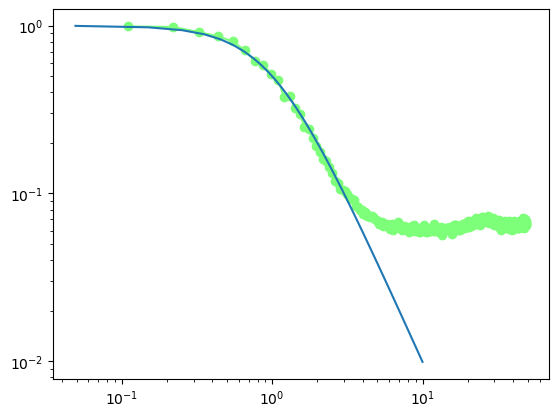

In [27]:



plot_omo(50,80,0.5,1,0,"Iaprn4e4",0.5)